In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/avyan/ML PROJECT/heart_disease__dataset.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,140.0,289,0,0,172,0,0.0,1,2,3,0
1,49,0,3,160.0,180,0,0,156,0,1.0,2,0,3,1
2,37,1,2,130.0,283,0,1,98,0,0.0,1,0,3,0
3,48,0,4,138.0,214,0,0,108,1,1.5,2,1,3,1
4,54,1,3,150.0,195,0,0,122,0,0.0,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,45,1,1,110.0,264,0,0,132,0,1.2,2,0,2,1
1223,68,1,4,144.0,193,1,0,141,0,3.4,2,0,3,1
1224,57,1,4,130.0,131,0,0,115,1,1.2,2,0,2,1
1225,57,0,2,130.0,236,0,2,174,0,0.0,2,0,3,1


## Taking care of missing values

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    7
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data = data.fillna(value = data['trestbps'].mean())

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Taking care of duplicate values

In [7]:
data_dup = data.duplicated().sum()

In [8]:
data_dup

85

In [9]:
data_dup = data.drop_duplicates(inplace=True)

In [10]:
data_dup

In [11]:
data_dup = data.duplicated().sum()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,2,140.0,289,0,0,172,0,0.0,1,2,3,0
1,49,0,3,160.0,180,0,0,156,0,1.0,2,0,3,1
2,37,1,2,130.0,283,0,1,98,0,0.0,1,0,3,0
3,48,0,4,138.0,214,0,0,108,1,1.5,2,1,3,1
4,54,1,3,150.0,195,0,0,122,0,0.0,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,45,1,1,110.0,264,0,0,132,0,1.2,2,0,2,1
1138,68,1,4,144.0,193,1,0,141,0,3.4,2,0,3,1
1139,57,1,4,130.0,131,0,0,115,1,1.2,2,0,2,1
1140,57,0,2,130.0,236,0,2,174,0,0.0,2,0,3,1


In [12]:
data.shape

(1142, 14)

In [13]:
print("Number of Rows", data.shape[0])
print("Number of Columns", data.shape[1])

Number of Rows 1142
Number of Columns 14


## Draw correlation matrix

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.017919,0.161570,0.257007,0.109835,0.181826,0.192772,-0.369120,0.198887,0.246439,0.239856,-0.013971,-0.009668,0.274996
sex,0.017919,1.000000,0.140221,-0.017699,-0.093592,0.114439,-0.021124,-0.179754,0.188574,0.086788,0.124791,0.041532,-0.021368,0.309004
cp,0.161570,0.140221,1.000000,0.011845,0.101560,0.081777,0.041972,-0.342927,0.415111,0.233958,0.286426,-0.012344,0.020422,0.466578
trestbps,0.257007,-0.017699,0.011845,1.000000,0.082639,0.087552,0.085721,-0.103357,0.143145,0.172399,0.088697,0.029647,0.004864,0.121118
chol,0.109835,-0.093592,0.101560,0.082639,1.000000,0.027761,0.087838,-0.029260,0.076280,0.065695,0.059610,0.000939,-0.029612,0.116986
fbs,0.181826,0.114439,0.081777,0.087552,0.027761,1.000000,0.036230,-0.120057,0.055910,0.042180,0.153159,0.036343,-0.044110,0.221952
restecg,0.192772,-0.021124,0.041972,0.085721,0.087838,0.036230,1.000000,0.056654,0.044221,0.123781,0.103415,0.009665,0.002067,0.074420
thalach,-0.369120,-0.179754,-0.342927,-0.103357,-0.029260,-0.120057,0.056654,1.000000,-0.377174,-0.175616,-0.341453,0.000843,0.025602,-0.409365
exang,0.198887,0.188574,0.415111,0.143145,0.076280,0.055910,0.044221,-0.377174,1.000000,0.374149,0.394091,-0.030465,0.001863,0.485012
oldpeak,0.246439,0.086788,0.233958,0.172399,0.065695,0.042180,0.123781,-0.175616,0.374149,1.000000,0.522693,-0.013120,-0.011123,0.401883


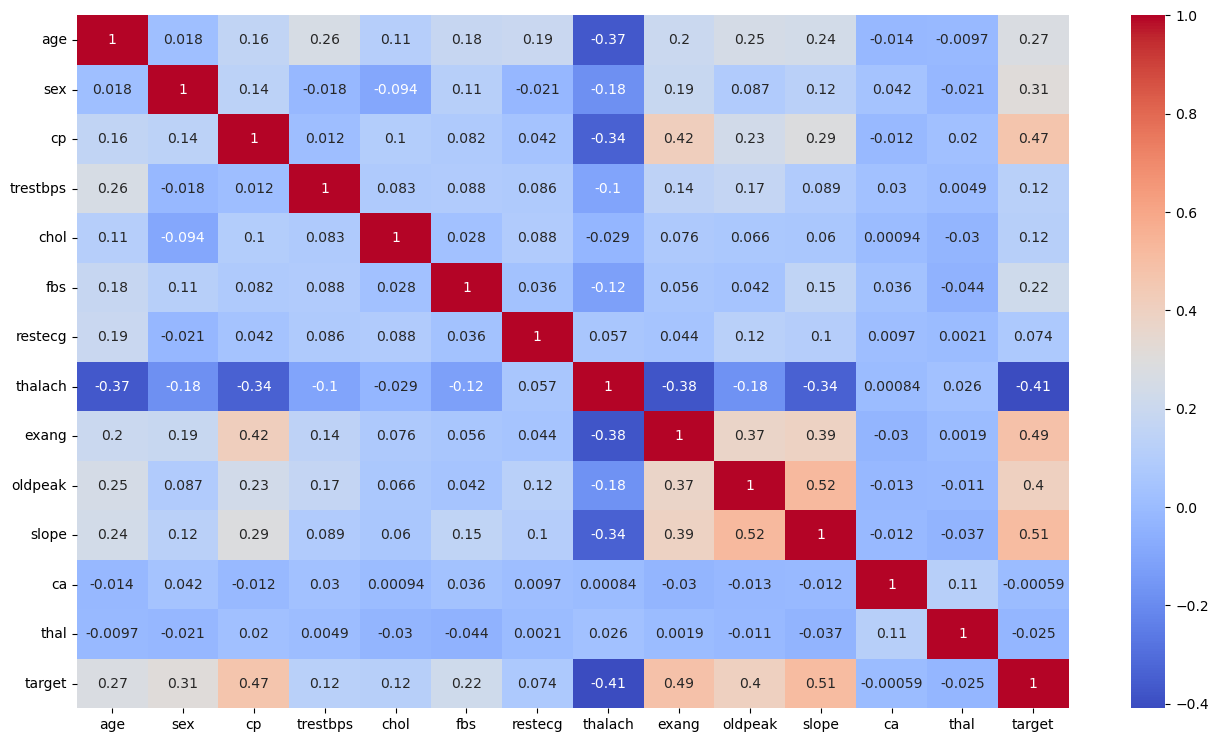

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),cmap = "coolwarm" ,annot=True)
plt.show()

## people having heart disease in dataset

In [17]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
data['target'].value_counts()

1    609
0    533
Name: target, dtype: int64

In [19]:
data['sex'].value_counts()

1    877
0    265
Name: sex, dtype: int64

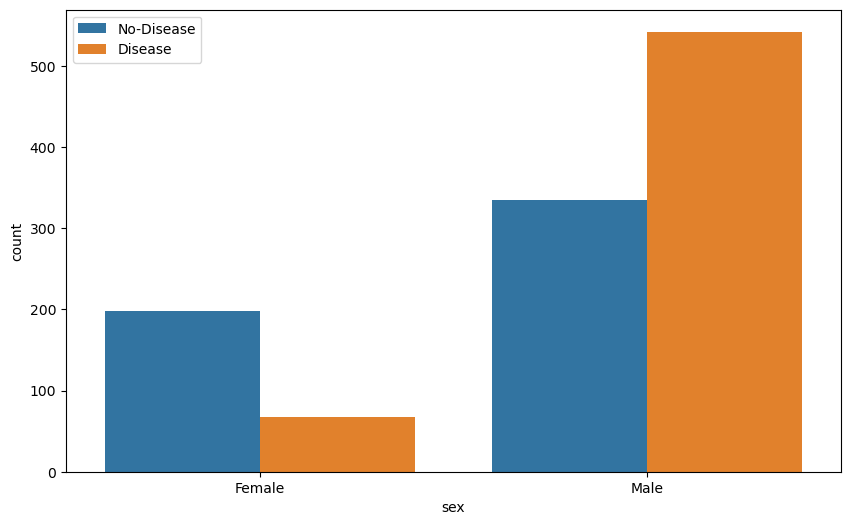

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

<Axes: xlabel='age', ylabel='Density'>

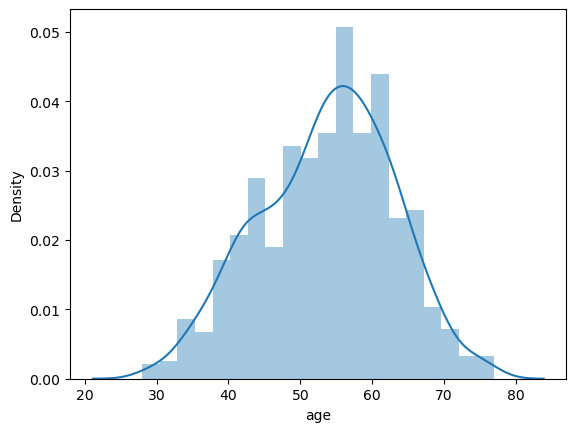

In [21]:
sns.distplot(data['age'])

## Data preprocessing

In [22]:
categorical_value = []
continuous_value = []

for column in data.columns:
    if data[column].nunique()<=10:
        categorical_value.append(column)
    else:
        continuous_value.append(column)

In [23]:
categorical_value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
continuous_value

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding categorical data

In [25]:
categorical_value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [26]:
data['cp'].unique()

array([2, 3, 4, 1], dtype=int64)

In [27]:
categorical_value.remove('sex')
categorical_value.remove('target')
data = pd.get_dummies(data , columns = categorical_value , drop_first = True)

In [28]:
categorical_value

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [29]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_2,cp_3,cp_4,...,exang_1,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,40,1,140.0,289,172,0.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,49,0,160.0,180,156,1.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,37,1,130.0,283,98,0.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,48,0,138.0,214,108,1.5,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4,54,1,150.0,195,122,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


## Feature scaling

In [30]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_2,cp_3,cp_4,...,exang_1,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,40,1,140.0,289,172,0.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,49,0,160.0,180,156,1.0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,37,1,130.0,283,98,0.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,48,0,138.0,214,108,1.5,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4,54,1,150.0,195,122,0.0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
st = StandardScaler()
data[continuous_value] = st.fit_transform(data[continuous_value])

In [33]:
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_2,cp_3,cp_4,...,exang_1,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,-1.459302,1,0.417935,0.730216,1.276752,-0.847607,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,-0.499446,0,1.509777,-1.189808,0.649211,0.076908,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,-1.779254,1,-0.127987,0.624527,-1.625622,-0.847607,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,-0.606097,0,0.308751,-0.590901,-1.233409,0.539166,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4,0.033807,1,0.963856,-0.925584,-0.684311,-0.847607,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


## Splitting the dataset into the training set and test set

In [34]:
X = data.drop('target', axis = 1)

In [35]:
y=data['target']

In [36]:
y.value_counts()

1    609
0    533
Name: target, dtype: int64

In [37]:
#To balance the imbalanced data
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(random_state=51)

In [38]:
x_re,y_re=rs.fit_resample(X,y)

In [39]:
y_re.value_counts()

0    609
1    609
Name: target, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=42)

In [42]:
y_test

541     1
259     0
43      0
1008    0
584     0
       ..
420     1
243     1
59      1
1073    1
63      1
Name: target, Length: 244, dtype: int64

## Machine Learning Algorithms

## Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
#optimizing decision tree
dt=DecisionTreeClassifier(criterion = "entropy", 
                                        splitter = "random", 
                                        max_depth = 10,
                                        min_samples_split = 3,
                                        min_samples_leaf = 6, 
                                        max_features = 5,
                                       random_state=200) 

In [45]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=5,
                       min_samples_leaf=6, min_samples_split=3,
                       random_state=200, splitter='random')

In [46]:
y_pred1 = dt.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test , y_pred1)

0.8155737704918032

In [49]:
# Training Accuracy
dt.score(X_train,y_train)

0.839835728952772

In [50]:
# testing Accuracay
dt.score(X_test,y_test) 

0.8155737704918032

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       115
           1       0.86      0.78      0.82       129

    accuracy                           0.82       244
   macro avg       0.82      0.82      0.82       244
weighted avg       0.82      0.82      0.82       244



## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=100) #hyperparameter

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred2 = rf.predict(X_test)

In [57]:
accuracy_score(y_test , y_pred2)

0.9180327868852459

In [58]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       115
           1       0.94      0.91      0.92       129

    accuracy                           0.92       244
   macro avg       0.92      0.92      0.92       244
weighted avg       0.92      0.92      0.92       244



## Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc=GradientBoostingClassifier()

In [61]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
y_pred3 = gbc.predict(X_test)

In [63]:
accuracy_score(y_test , y_pred3)

0.9221311475409836

In [64]:
# Training Accuracy
gbc.score(X_train,y_train)

0.946611909650924

In [65]:
# testing Accuracay
gbc.score(X_test,y_test) 

0.9221311475409836

In [66]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       115
           1       0.94      0.91      0.92       129

    accuracy                           0.92       244
   macro avg       0.92      0.92      0.92       244
weighted avg       0.92      0.92      0.92       244



In [67]:
final_data=pd.DataFrame({'Models':['DT','RF','GB'],
                        'ACC':[accuracy_score(y_test , y_pred1),
                              accuracy_score(y_test , y_pred2),
                              accuracy_score(y_test , y_pred3)]})
                              
                            
                              

In [68]:
final_data

,Models,ACC
0,DT,0.815574
1,RF,0.918033
2,GB,0.922131


In [69]:
import seaborn as sns

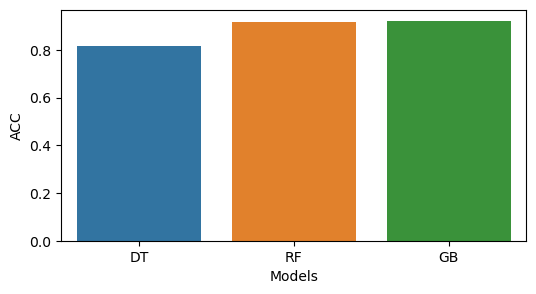

In [70]:
plt.figure(figsize=(6,3))
sns.barplot(x='Models',y='ACC',data = final_data)
plt.show()

# 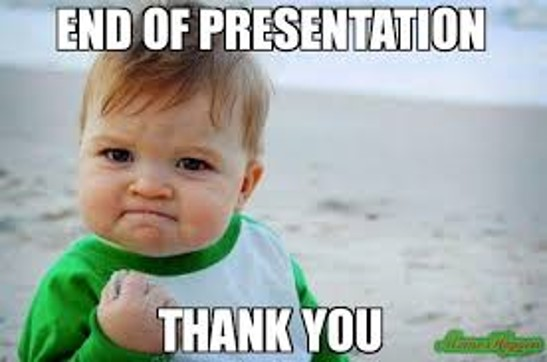